Drag on dart is 0 for validation of model.

In [1]:
%matplotlib notebook

from modsim import *

In [2]:
condition = Condition(x = 0, 
                      y = 0,
                      g = 9.8,
                      mass = 1e-3,
                      diameter = 1e-2,
                      rho = 1.2,
                      C_d = 0, #.67
                      angle = 0,
                      velocity = 10,
                      duration = 5)

In [3]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, rel_vy = pol2cart(theta, velocity)
    abs_vy = rel_vy + 53
    
    # make the initial state
    init = State(x=x, abs_y=y, rel_y=y, vx=vx, abs_vy=abs_vy, rel_vy = rel_vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 400)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, abs_y, rel_y, vx, abs_vy, rel_vy = state
    unpack(system)
    
    f_drag_x = -rho * vx**2 * C_d * area / 2
    a_x = f_drag_x / mass
    
    f_drag_y = -rho * abs_vy**2 * C_d * area / 2
    a_y = f_drag_y / mass + g
    
    vx = vx + (a_x * t)
    abs_vy = abs_vy + (a_y * t)
    rel_vy = abs_vy - 53
    
    return vx, abs_vy, rel_vy, a_x, a_y, a_y

In [4]:
system = make_system(condition)
slope_func(system.init, 0, system)
run_odeint(system, slope_func)

In [5]:
#Absolute
xs = system.results.x
abs_ys = -system.results.abs_y
vxs = system.results.vx
abs_vys = system.results.abs_vy

#Relative
xs = system.results.x
rel_ys = -system.results.rel_y
vxs = system.results.vx
rel_vys = system.results.rel_vy

<IPython.core.display.Javascript object>


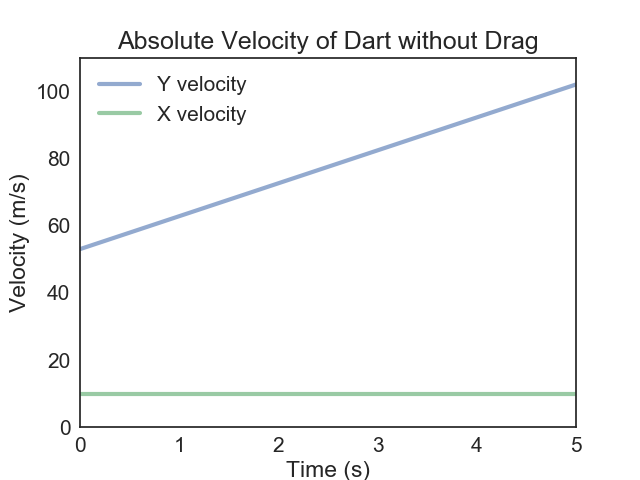

Saving figure to file nodrag.pdf


In [8]:
 def plot_trajectory(angle):
    condition.set(angle = angle)
    system = make_system(condition)
    slope_func(system.init, 0, system)
    run_odeint(system, slope_func)
    
    xs = system.results.x
    rel_ys = -system.results.rel_y
    
    x_series = interpolate(xs, kind = 'cubic')
    y_series = interpolate(rel_ys, kind = 'cubic')

    newfig()
    plot(ts, abs_vys, label='Y velocity')
    plot(ts, vxs, label='X velocity')

    decorate(xlabel='Time (s)',
             ylabel='Velocity (m/s)',
             title='Absolute Velocity of Dart without Drag',
             xlim=[0, 5],
             ylim=[0,110])

plot_trajectory(-45)
savefig('nodrag.pdf')

In [ ]:
'''
    #Relative Graph
    newfig()
    plot(xs, rel_ys, label='trajectory')
    
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             title='Relative Trajectory of Dart'),
             xlim=[0, 5],
             ylim=[-1, 5])
    #Absolute Graph
    newfig()
    plot(xs, abs_ys, label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             title='Absolute Trajectory of Dart'),
             xlim=[0, 10],
             ylim=[-10, 0])
'''
    #Velocity Graph